In [8]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline 
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split,cross_val_score
la_en = pre.LabelEncoder() 

In [9]:
Loan= pd.read_csv("Loan_Status.csv")

In [10]:
lcopy=Loan.copy()

In [11]:
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [12]:
Loan.isna().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [13]:
Loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
Loan['Gender'].fillna(Loan['Gender'].mode()[0], inplace=True)  
Loan['Dependents'].fillna(Loan['Dependents'].mode()[0], inplace=True) 
Loan['Self_Employed'].fillna(Loan['Self_Employed'].mode()[0], inplace=True) 
Loan['Credit_History'].fillna(Loan['Credit_History'].mode()[0], inplace=True)

In [15]:
Loan['Loan_Amount_Term'].fillna(Loan['Loan_Amount_Term'].mode()[0], inplace=True)

In [16]:
Loan.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [17]:
Loan['LoanAmount'].fillna(Loan['LoanAmount'].median(), inplace=True) #continuous data can be filled with mean/median

In [18]:
Loan.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [19]:
Loan.Education=la_en.fit_transform(Loan.Education)

In [20]:
Loan['Property_Area']=la_en.fit_transform(Loan['Property_Area'])

In [21]:
Loan['Loan_Status']=la_en.fit_transform(Loan['Loan_Status'])

In [22]:
Loan['Self_Employed']=la_en.fit_transform(Loan['Self_Employed'])

In [23]:
Loan['Dependents']=la_en.fit_transform(Loan['Dependents'])

In [24]:
Loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [25]:
Loan=Loan.drop('Loan_ID',axis=1)

In [26]:
Loan=Loan.drop('Gender',axis=1)

In [27]:
Loan=Loan.drop('Married',axis=1)

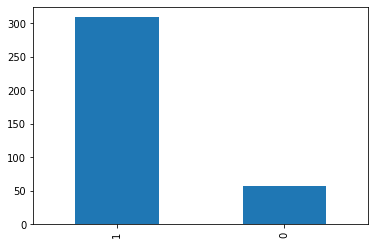

In [28]:
Loan['Loan_Status'].value_counts().plot.bar()

# Data is too biased towards yes!

In [29]:
X= Loan.drop('Loan_Status',axis=1)

In [30]:
Y= Loan.Loan_Status

In [31]:
Loan

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,0,1,0,3276,0,78.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
362,3,1,1,4009,1777,113.0,360.0,1.0,2,1
363,0,0,0,4158,709,115.0,360.0,1.0,2,1
364,0,0,0,3250,1993,126.0,360.0,1.0,1,1
365,0,0,0,5000,2393,158.0,360.0,1.0,0,1


In [32]:
plt.figure(1)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

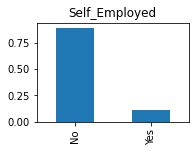

In [33]:
plt.subplot(223) 
lcopy['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

# Support Vector Machine

In [34]:
from sklearn.svm import SVC

In [35]:
model=SVC()

In [48]:
X_train, X_test ,y_train, y_test= train_test_split(X,Y, test_size=0.2)

In [49]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
model.score(X_test,y_test).mean()

0.8378378378378378

In [51]:
Svc_score=model.score(X_test,y_test).mean()

# Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression 

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
model2 = LogisticRegression() 

In [55]:
model2.fit(X_train, y_train)

H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
model2.score(X_test,y_test).mean()

0.972972972972973

In [57]:
Lr_score=model2.score(X_test,y_test).mean()

In [58]:
predict=model2.predict(X_test)

In [59]:
accuracy_score(y_test,predict)

0.972972972972973

# KNN

In [60]:
from sklearn.preprocessing import StandardScaler as ss

In [61]:
scaler=ss()

In [62]:
scaler.fit(Loan.drop('Loan_Status',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
sf=scaler.transform(Loan.drop('Loan_Status',axis=1))

In [64]:
scaled_Loan=pd.DataFrame(sf,columns=Loan.columns[:-1])

In [65]:
scaled_Loan

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.758222,-0.544812,-0.334845,0.186461,-0.673335,-0.426780,0.266022,0.437674,1.118764
1,0.181871,-0.544812,-0.334845,-0.352692,-0.029848,-0.163953,0.266022,0.437674,1.118764
2,1.121964,-0.544812,-0.334845,0.039641,0.098849,1.183033,0.266022,0.437674,1.118764
3,1.121964,-0.544812,-0.334845,-0.502774,0.418877,-0.591047,0.266022,0.437674,1.118764
4,-0.758222,1.835497,-0.334845,-0.311909,-0.673335,-0.952433,0.266022,0.437674,1.118764
...,...,...,...,...,...,...,...,...,...
362,2.062056,1.835497,2.986456,-0.162439,0.088982,-0.377500,0.266022,0.437674,1.118764
363,-0.758222,-0.544812,-0.334845,-0.132056,-0.369180,-0.344647,0.266022,0.437674,1.118764
364,-0.758222,-0.544812,-0.334845,-0.317211,0.181644,-0.163953,0.266022,0.437674,-0.095989
365,-0.758222,-0.544812,-0.334845,0.039641,0.353241,0.361700,0.266022,0.437674,-1.310741


In [66]:
X2=scaled_Loan

In [67]:
Y2=Loan["Loan_Status"]

In [73]:
X_train2, X_test2 ,y_train2, y_test2= train_test_split(X2,Y2, test_size=0.3)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn=KNeighborsClassifier(n_neighbors=7)

In [76]:
knn.fit(X_train2,y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [77]:
knn.score(X_test2,y_test2)

0.990990990990991

In [128]:
cross_val_score(knn,X2,Y2,cv=2)

array([0.98913043, 0.99453552])

In [78]:
Knn_score=knn.score(X_test2,y_test2)

In [79]:
from sklearn.metrics import confusion_matrix as cmat

In [80]:
prediction_KNN=knn.predict(X_test2)

In [81]:
print(cmat(y_test2,prediction_KNN))

[[14  1]
 [ 0 96]]


# Decision tree

In [82]:
from sklearn import tree

In [83]:
model3 = tree.DecisionTreeClassifier(min_samples_split=5) 

In [84]:
model3.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
model3.score(X_test2,y_test2)

1.0

In [86]:
Dt_score=model3.score(X_test2,y_test2)

In [87]:
prediction_tree=model3.predict(X_test2)

In [88]:
print(cmat(y_test2,prediction_tree))

[[15  0]
 [ 0 96]]


# ALL SCORES

In [90]:
print("Score of all models: \n SVC: \t %f \n LR: \t %f \n KNN: \t %f \n DT: \t %f" % (Svc_score,Lr_score,Knn_score,Dt_score))

Score of all models: 
 SVC: 	 0.837838 
 LR: 	 0.972973 
 KNN: 	 0.990991 
 DT: 	 1.000000
